<a href="https://colab.research.google.com/github/mohdsaad379/MachineLearning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn import datasets

In [130]:
titanic_data=pd.read_csv('/content/sample_data/train.csv')

In [131]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
print("number of passenger: "+str(len(titanic_data.index)))

number of passenger: 891


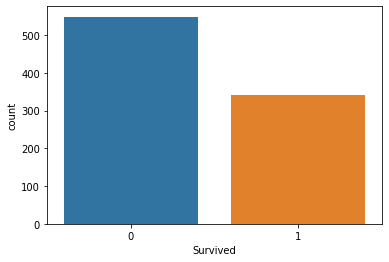

In [133]:
##analysing DAta
sns.countplot(x="Survived",data=titanic_data)

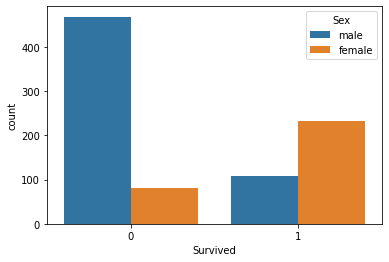

In [134]:
sns.countplot(x="Survived",hue='Sex',data=titanic_data)

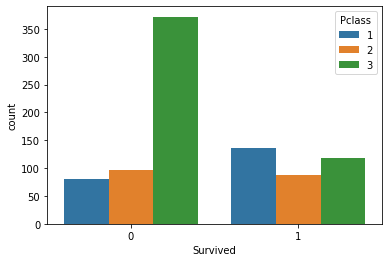

In [135]:
sns.countplot(x="Survived",hue='Pclass',data=titanic_data)

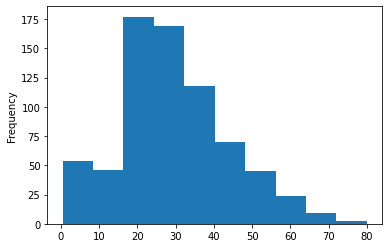

In [136]:
titanic_data["Age"].plot.hist()

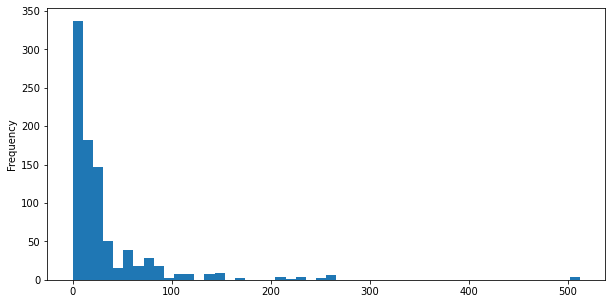

In [137]:
titanic_data["Fare"].plot.hist(bins=50,figsize=(10,5))

In [138]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [139]:
#data wrangling
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [140]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

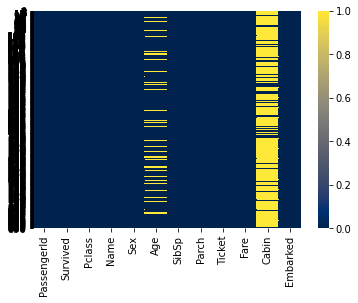

In [141]:
sns.heatmap(titanic_data.isnull(),yticklabels=True,cmap='cividis')

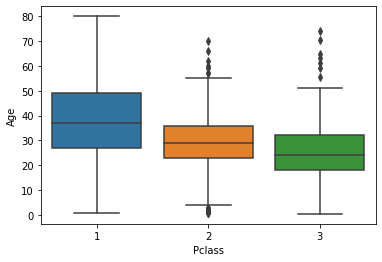

In [142]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

In [143]:
titanic_data.drop("Cabin",axis=1, inplace=True)


In [144]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


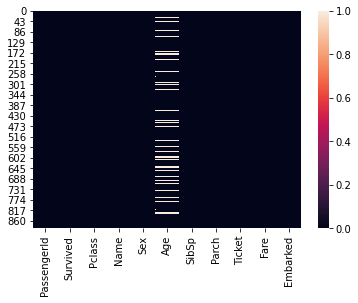

In [145]:
sns.heatmap(titanic_data.isnull())

In [146]:
titanic_data.dropna(inplace=True)

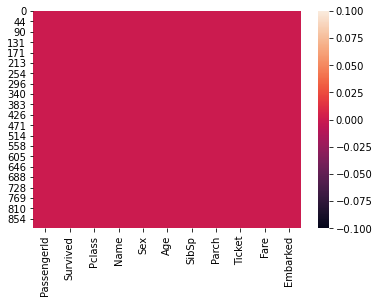

In [147]:
sns.heatmap(titanic_data.isnull())

In [148]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [149]:
Gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [150]:
Embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
Embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [151]:
Pc1=pd.get_dummies(titanic_data['Pclass'],drop_first=True)
Pc1

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [152]:
titanic_data=pd.concat([titanic_data,Gender,Embark,Pc1],axis=1)

In [153]:
titanic_data=titanic_data.drop(['Sex','Pclass','Name','Ticket','PassengerId','Embarked'],axis=1)

In [154]:
X=titanic_data.drop('Survived',axis=1)
print(X.head())
Y=titanic_data['Survived']

    Age  SibSp  Parch     Fare  male  Q  S  2  3
0  22.0      1      0   7.2500     1  0  1  0  1
1  38.0      1      0  71.2833     0  0  0  0  0
2  26.0      0      0   7.9250     0  0  1  0  1
3  35.0      1      0  53.1000     0  0  1  0  0
4  35.0      0      0   8.0500     1  0  1  0  1


In [155]:
!pip install sklearn
from sklearn.model_selection import train_test_split

In [156]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)  

In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
LRmodel=LogisticRegression()
X_train.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
244,30.0,0,0,7.2250,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
747,30.0,0,0,13.0000,0,0,1,1,0
10,4.0,1,1,16.7000,0,0,1,0,1
844,17.0,0,0,8.6625,1,0,1,0,1


In [159]:
LRmodel=LRmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [160]:
predictions=LRmodel.predict(X_test)

In [161]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [162]:
str1=classification_report(y_test,predictions)
print(str1)

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       139
           1       0.75      0.73      0.74        96

    accuracy                           0.79       235
   macro avg       0.78      0.78      0.78       235
weighted avg       0.79      0.79      0.79       235



In [163]:
confusion_matrix(y_test,predictions)

array([[116,  23],
       [ 26,  70]])

In [164]:
accuracy_score(y_test,predictions)

0.7914893617021277

**SUV model of Prediction**

In [182]:
suv_data=pd.read_csv('/content/sample_data/suv_data.csv')

In [183]:
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [184]:
Sex=pd.get_dummies(suv_data['Gender'],drop_first=True)

In [185]:
suv_data.drop(['User ID','Gender'],axis=1, inplace=True)
suv_data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [186]:
suv_data=pd.concat([suv_data,Sex],axis=1)

In [187]:
suv_data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
Male               0
dtype: int64

In [188]:
Y=suv_data['Purchased']
Y.head()
suv_data.drop('Purchased',axis=1,inplace=True)

In [191]:
X=suv_data

In [231]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [232]:
from sklearn.preprocessing import StandardScaler

In [233]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [234]:
LRmodel=LRmodel.fit(X_train,Y_train)

In [235]:
# Y_test=np.array(Y_test)
# Y_test=Y_test.reshape(-1,1)

predictions=LRmodel.predict(X_test)

In [236]:
accuracy_score(Y_test,predictions)

0.9